# Домашняя работа №2

In [1]:
import numpy as np
from scipy.optimize import approx_fprime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import math
import sympy

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


# Решение
Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$

$f'(x) = 2*sin(2x+1)*sin(2x+1)'$

$f'(x) = 4*sin(2x+1)*cos(2x+1)$ - Первая производная


$f''(x)= 4*(cos(2x+1)'*sin(2x+1)+sin(2x+1)'*cos(2x+1))$

$f''(x)=4*(-2sin(2x+1)^2+2*cos(2x+1)^2)$

$f''(x)= -8sin(2x+1)^2+8cos(2x+1)^2$


In [2]:
from scipy.misc import derivative
def f(x):
    return np.sin(2*x+1)**2
derivative(f, 1.0)

0.1057311731323275

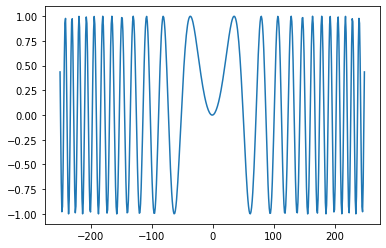

In [3]:
x = np.array([i for i in range(-250, 250)])
y = np.array([math.sin(math.radians(2*x_i+1)**2) for x_i in x])
plt.plot(x, y)

In [4]:
#Первая производная
list_der_sin = []
for i in range(len(x)-1):
    list_der_sin.append((y[i+1]-y[i])/(x[i+1]-x[i]))
list_der_sin.append(list_der_sin[-1])

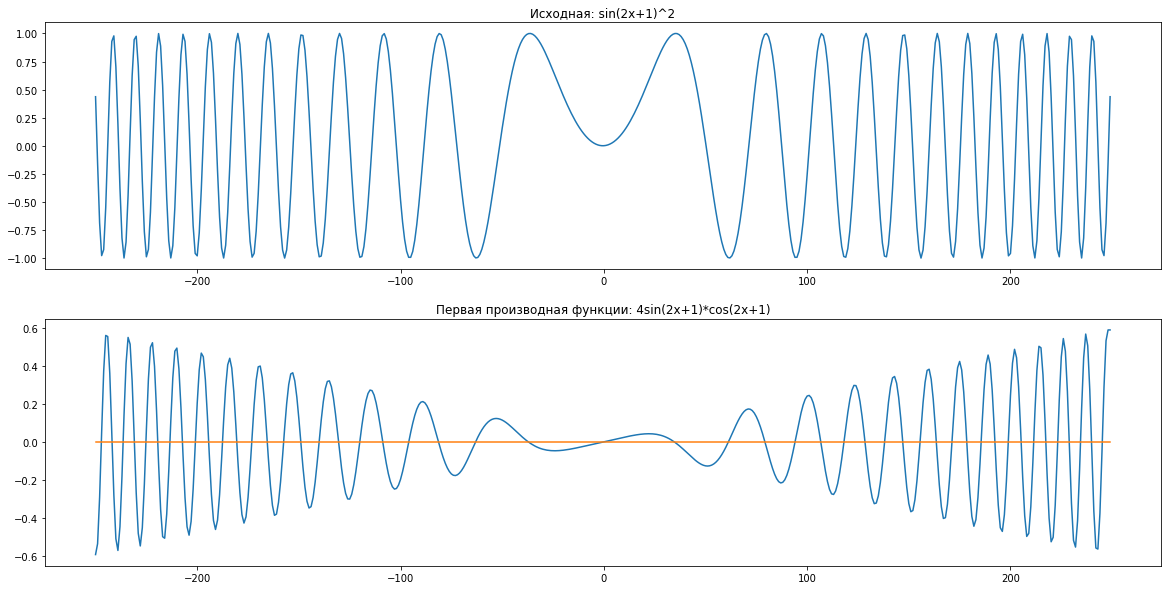

In [5]:
fig, axs = plt.subplots(2,figsize=(20,10))
axs[0].set_title('Исходная: sin(2x+1)^2')
axs[0].plot(x, y)
axs[1].set_title('Первая производная функции: 4sin(2x+1)*cos(2x+1)')
axs[1].plot(x, list_der_sin)
axs[1].plot(x, [0 for i in range(len(list_der_sin))], '-')

In [6]:
#вторая производная
list_second_der_sin = []
for i in range(len(x)-1):
    list_second_der_sin.append((list_der_sin[i+1]-list_der_sin[i])/(x[i+1]-x[i]))
list_second_der_sin.append(list_second_der_sin[-1])

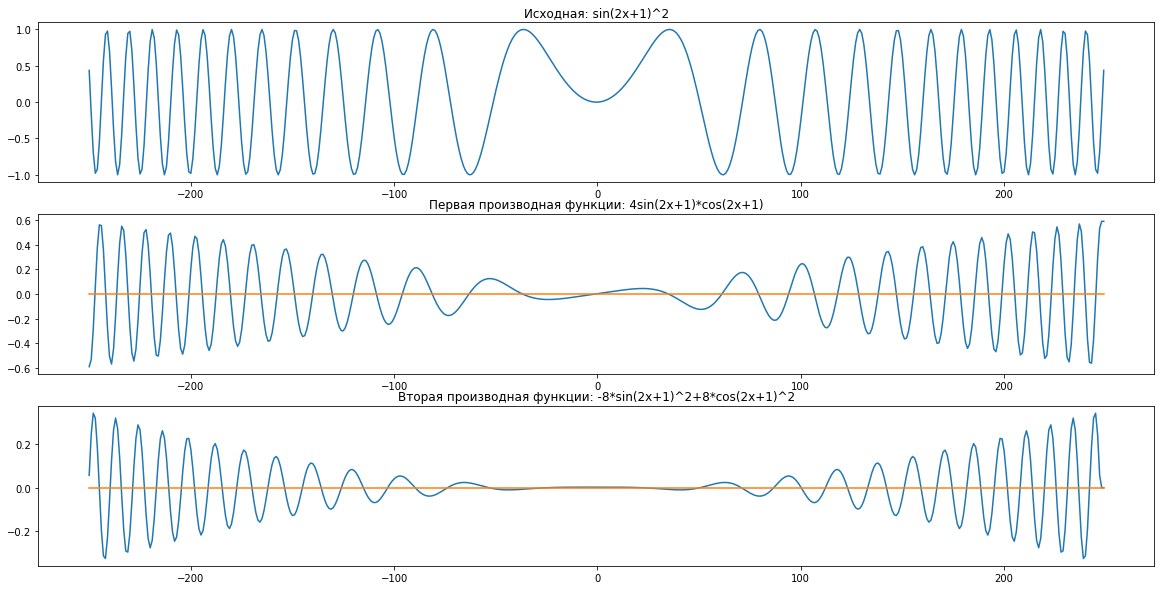

In [131]:
fig, axs = plt.subplots(3,figsize=(20,10))
axs[0].set_title('Исходная: sin(2x+1)^2')
axs[0].plot(x, y)
axs[1].set_title('Первая производная функции: 4sin(2x+1)*cos(2x+1)')
axs[1].plot(x, list_der_sin)
axs[1].plot(x, [0 for i in range(len(list_der_sin))], '-')
axs[2].set_title('Вторая производная функции: -8*sin(2x+1)^2+8*cos(2x+1)^2')
axs[2].plot(x, list_second_der_sin)
axs[2].plot(x, [0 for i in range(len(list_der_sin))], '-')

### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

# Решение

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$


$fx'= 4xy^3-1/x^2+y^2$

$fy'=6x^2y^2+2yx$

$fx'(1,2) = 4*1*2^3-1+2*2=35$


$fy'(1,2)=6*1*2^2+2*2*1=28$

In [7]:
def func(x, c0, c1, c2):
    "Coordinate vector `x` should be an array of size two."
    return c0 * x[0]**2 * x[1]**3 + c1 * 1/x[0] + (c2 * x[0] * x[1]**2 )+7

In [8]:
x = np.array([1,2])
c0, c1, c2 = (2, 1, 1)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func,[eps, eps], c0, c1, c2)

array([35.00000024, 28.00000024])

In [9]:
from sympy import *
x, y = symbols('x y')


In [10]:
diff(2*x**2*y**3 + 1/x + x*y**2 + 7, x)

4*x*y**3 + y**2 - 1/x**2

In [11]:
diff(2*x**2*y**3 + 1/x + x*y**2 + 7, y)

6*x**2*y**2 + 2*x*y

### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [12]:
import pandas as pd
data = pd.read_csv('data/video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


Text(0, 0.5, 'изменение высоты по времени')

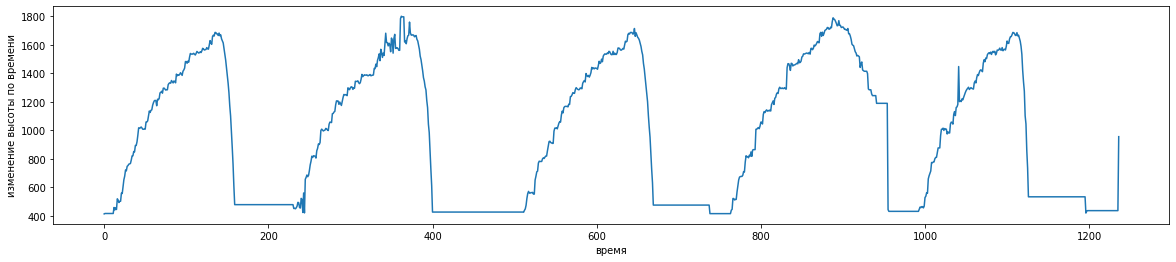

In [13]:
plt.figure(figsize=(20,4))
plt.plot(data.height)
plt.xlabel('время')
plt.ylabel('изменение высоты по времени')

In [14]:
data['height_2'] = data.height * -1


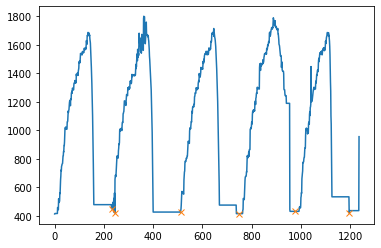

In [15]:
peaks, _ = find_peaks(data. height_2, prominence=1, width=20)
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "x")
plt.show()